# 6.6 Sourcing & Analyzing Time-Series Data

### This notbooke contains

#### 1. Importing Libraries and data

#### 2. Subsetting, wrangliing, and cleaning time-series data

#### 3. Decomposeing the data components

#### 4. Testing for stationarity 

#### 5. Stationarizing 

### 1. Importing Libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
# Configure the API key
quandl.ApiConfig.api_key = 'wzsazRqCFPniCuxb5Dod'

In [3]:
# Importing Netflix short interest
data= quandl.get('FINRA/FNSQ_NFLX')

In [4]:
# Checking the data
data.head()

,ShortVolume,ShortExemptVolume,TotalVolume
Date,,,
2013-04-01,409150.0,100.0,1078168.0
2013-04-02,591669.0,100.0,1587910.0
2013-04-03,1555766.0,0.0,4146769.0
2013-04-04,810349.0,100.0,1876342.0
2013-04-05,636850.0,0.0,1449796.0


In [5]:
data.shape

(2101, 3)

In [6]:
data.columns

Index(['ShortVolume', 'ShortExemptVolume', 'TotalVolume'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

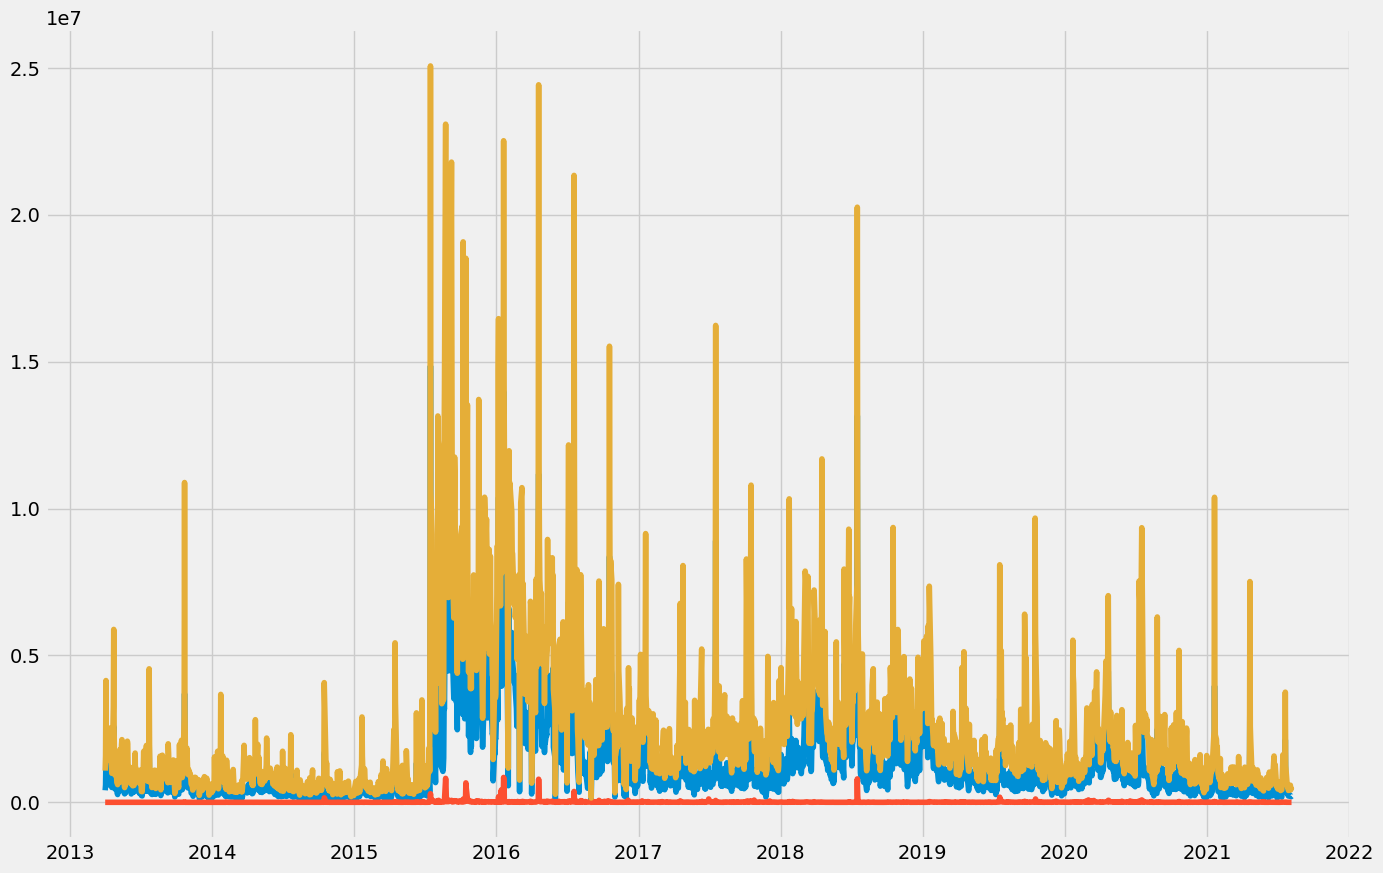

In [8]:
# looking at it before I subset it
plt.figure(figsize=(15,10), dpi=100)
plt.plot(data)

### 2. Subsetting, wrangliing, and cleaning time-series data

In [9]:
# Reseting the index so i can filter 
data_2= data.reset_index()

In [10]:
data_2.head()

,Date,ShortVolume,ShortExemptVolume,TotalVolume
0,2013-04-01,409150.0,100.0,1078168.0
1,2013-04-02,591669.0,100.0,1587910.0
2,2013-04-03,1555766.0,0.0,4146769.0
3,2013-04-04,810349.0,100.0,1876342.0
4,2013-04-05,636850.0,0.0,1449796.0


In [11]:
data_sub= data_2.loc[(data_2['Date'] >= '2015-01-01') & (data_2['Date'] < '2020-01-01')]

In [12]:
data_sub_1=data_sub.drop(['ShortExemptVolume'],axis = 1)

In [13]:
data_sub_1.shape

(1254, 3)

In [14]:
data_sub_1.head()

,Date,ShortVolume,TotalVolume
444,2015-01-02,213003.0,473881.0
445,2015-01-05,404216.0,712844.0
446,2015-01-06,407859.0,665117.0
447,2015-01-07,201679.0,345821.0
448,2015-01-08,141881.0,319194.0


Decided to get rid of data before 2015 and after 2020 just to make it a bit smaller and have it better show when it blew up and steadaly went down. Also got rid of the exempt Volume.

In [15]:
# Seperating the data so it is easier to look at 
data_year_1= data_sub_1.loc[(data_sub_1['Date'] >= '2015-01-01') & (data_sub_1['Date'] < '2016-01-01')]
data_year_2= data_sub_1.loc[(data_sub_1['Date'] >= '2016-01-01') & (data_sub_1['Date'] < '2017-01-01')]
data_year_3= data_sub_1.loc[(data_sub_1['Date'] >= '2017-01-01') & (data_sub_1['Date'] < '2018-01-01')]
data_year_4= data_sub_1.loc[(data_sub_1['Date'] >= '2018-01-01') & (data_sub_1['Date'] < '2019-01-01')]
data_year_5= data_sub_1.loc[(data_sub_1['Date'] >= '2019-01-01') & (data_sub_1['Date'] < '2020-01-01')]

In [16]:
# Setting the Date column as a index
from datetime import datetime
data_sub_1['datetime'] = pd.to_datetime(data_sub_1['Date']) 
data_sub_1 = data_sub_1.set_index('datetime')
data_sub_1.drop(['Date'], axis=1, inplace=True)
data_sub_1.head()

,ShortVolume,TotalVolume
datetime,,
2015-01-02,213003.0,473881.0
2015-01-05,404216.0,712844.0
2015-01-06,407859.0,665117.0
2015-01-07,201679.0,345821.0
2015-01-08,141881.0,319194.0


In [17]:
# for the rest of them
from datetime import datetime
data_year_1['datetime'] = pd.to_datetime(data_year_1['Date'])
data_year_1= data_year_1.set_index('datetime')
data_year_1.drop(['Date'], axis=1, inplace=True) 
data_year_2['datetime'] = pd.to_datetime(data_year_2['Date'])
data_year_2= data_year_2.set_index('datetime')
data_year_2.drop(['Date'], axis=1, inplace=True)
data_year_3['datetime'] = pd.to_datetime(data_year_3['Date'])
data_year_3= data_year_3.set_index('datetime')
data_year_3.drop(['Date'], axis=1, inplace=True)
data_year_4['datetime'] = pd.to_datetime(data_year_4['Date'])
data_year_4= data_year_4.set_index('datetime')
data_year_4.drop(['Date'], axis=1, inplace=True)
data_year_5['datetime'] = pd.to_datetime(data_year_5['Date'])
data_year_5= data_year_5.set_index('datetime')
data_year_5.drop(['Date'], axis=1, inplace=True)

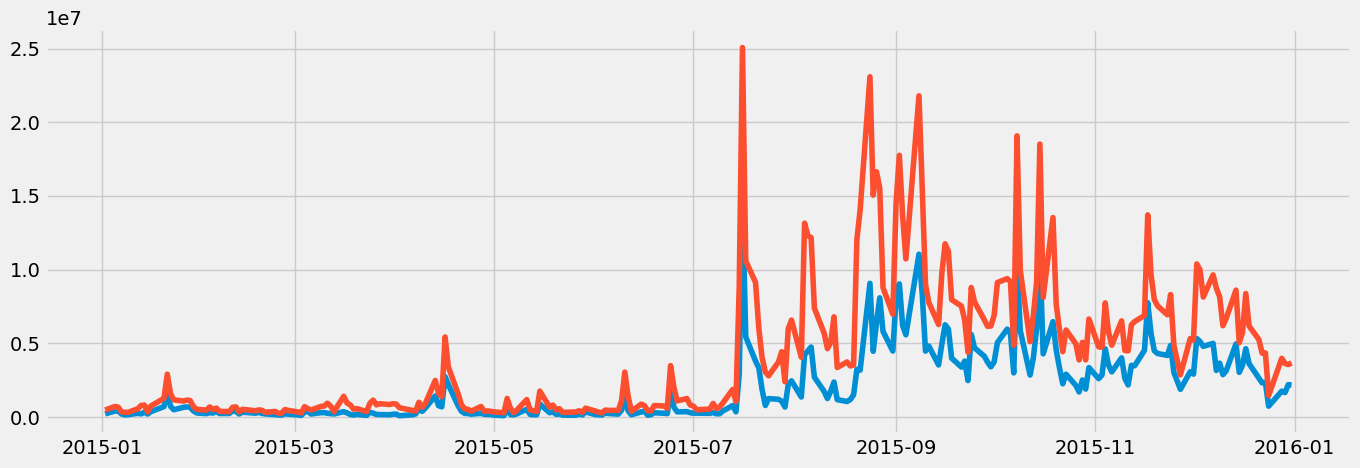

In [18]:
# Looking at the new plot for the data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_year_1)

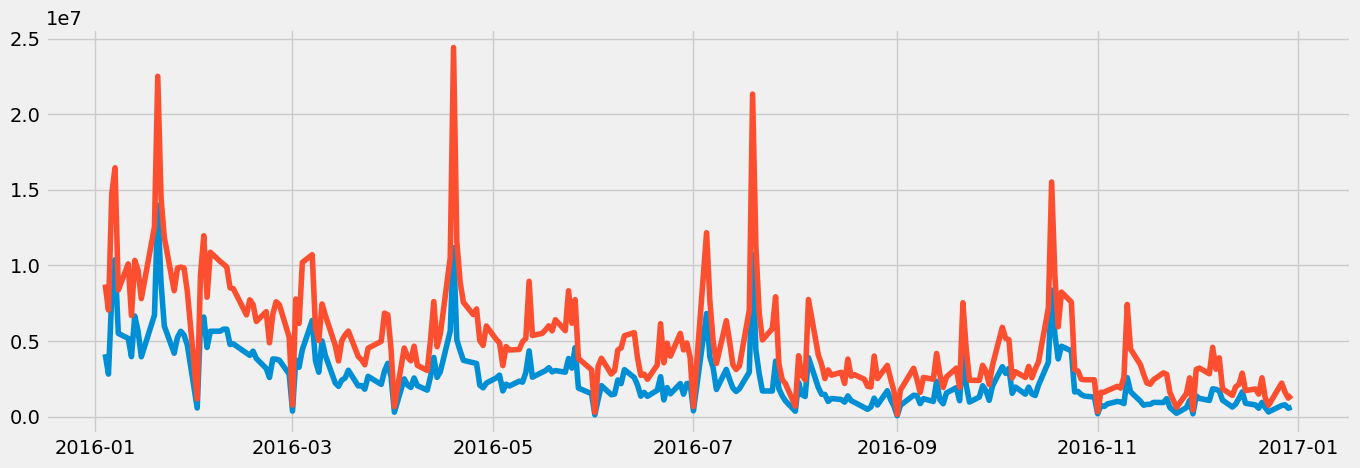

In [19]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_year_2)

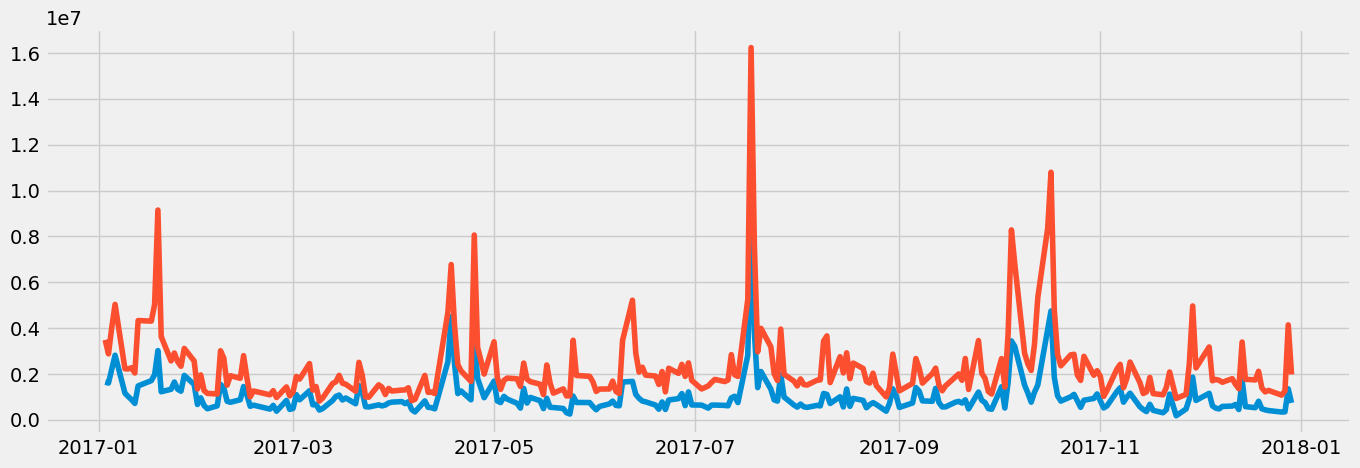

In [20]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_year_3)

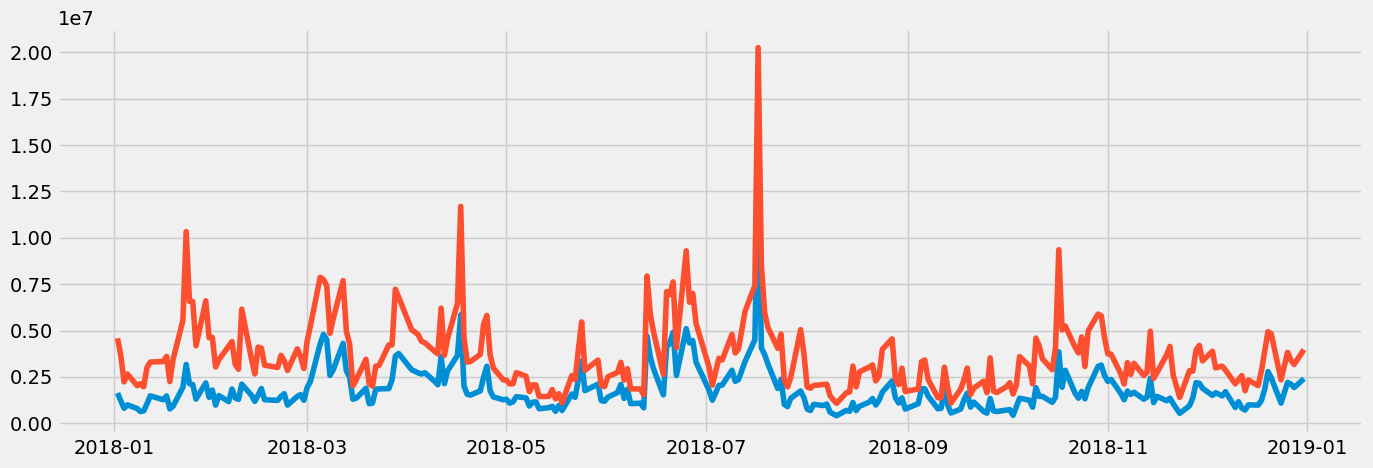

In [21]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_year_4)

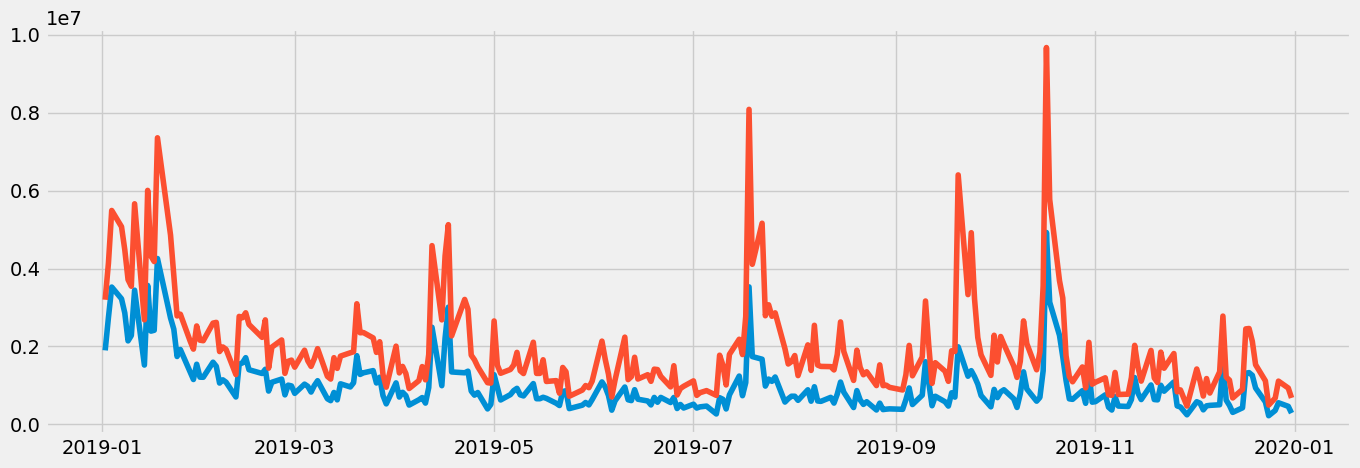

In [22]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_year_5)

#### Missing values

In [23]:
# checking the main data frame
data_sub_1.isnull().sum()

ShortVolume    0
TotalVolume    0
dtype: int64

#### Looking for duplicates

In [24]:
# checking the main data frame
dups= data_sub_1.duplicated()
dups.sum()

0

### 3. Decomposeing the data components

In [25]:
# So we can decompose the data total value
data_sub_2=data_sub_1.drop(['ShortVolume'],axis = 1)

In [26]:
# Decomposeing the main data frame
decomposition = sm.tsa.seasonal_decompose(data_sub_2, model='additive',freq=12)

In [27]:
# Define a fixed size for special charts
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

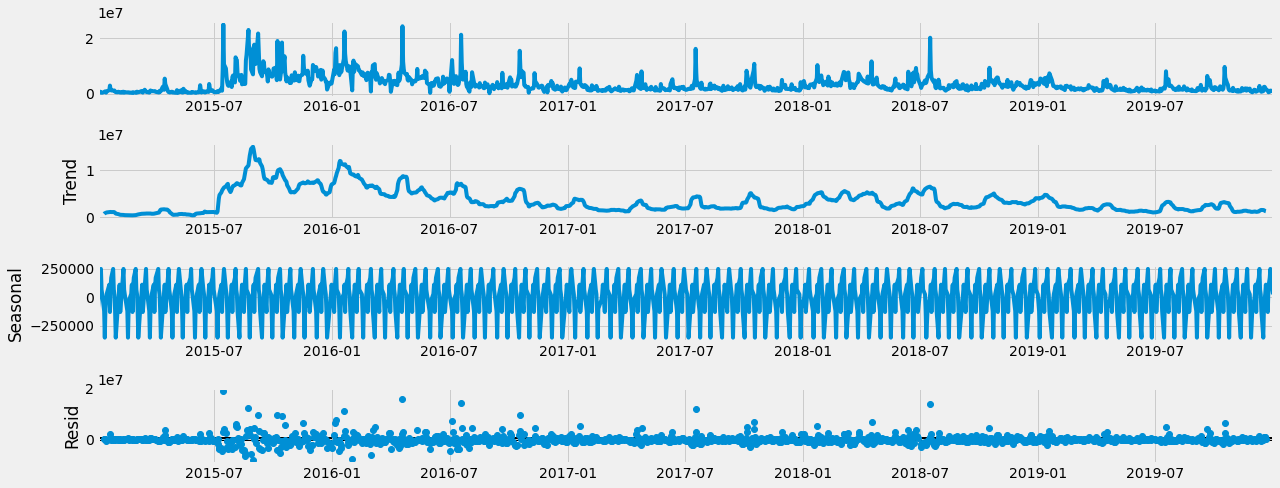

In [28]:
# Ploting the separate components
decomposition.plot()
plt.show()

The level and the trend do differ a bit because of the noise but it in not by that muc. After 2015 there has been a downward trend in netflix shares it goes back up ever so often but generally a downward trend. 

### 4. Testing for stationarity 

In [29]:
# importing the adfuller and defineing the function
from statsmodels.tsa.stattools import adfuller 
def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

In [30]:
#applaying the function
dickey_fuller(data_sub_2['TotalVolume'])

Dickey-Fuller Stationarity test:
Test Statistic                   -3.973013
p-value                           0.001559
Number of Lags Used              12.000000
Number of Observations Used    1241.000000
Critical Value (1%)              -3.435630
Critical Value (5%)              -2.863872
Critical Value (10%)             -2.568011
dtype: float64


The test statistic is lower the the critical values

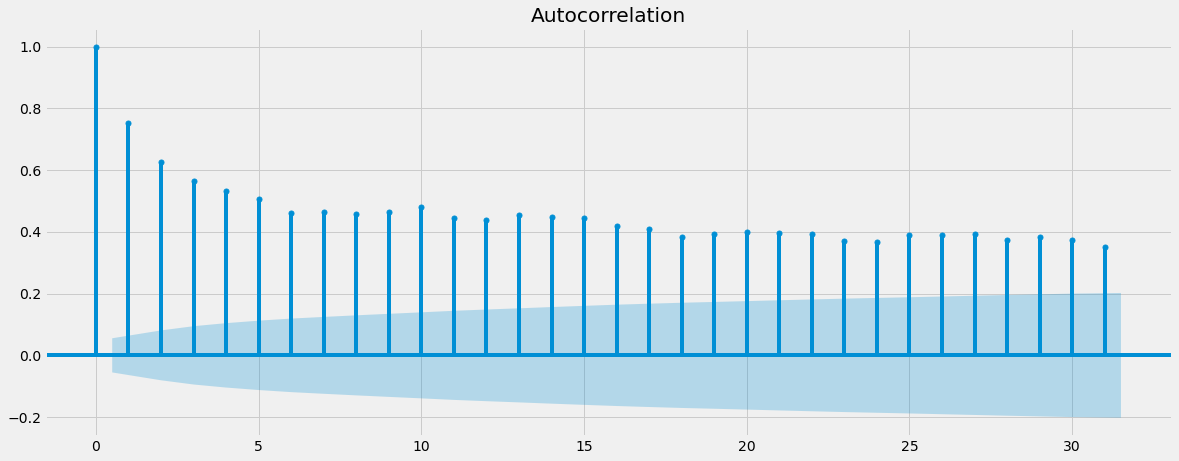

In [31]:
# checking out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_sub_2)
plt.show()

### 5. Stationarizing 

In [32]:
# Shifting the data
data_diff= data_sub_2 - data_sub_2.shift(1) 

In [33]:
# removing the missing values
data_diff.dropna(inplace = True)

In [34]:
data_diff.head()

,TotalVolume
datetime,
2015-01-05,238963.0
2015-01-06,-47727.0
2015-01-07,-319296.0
2015-01-08,-26627.0
2015-01-09,-5643.0


In [35]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.075736e+01
p-value                        2.572699e-19
Number of Lags Used            2.300000e+01
Number of Observations Used    1.229000e+03
Critical Value (1%)           -3.435682e+00
Critical Value (5%)           -2.863895e+00
Critical Value (10%)          -2.568024e+00
dtype: float64


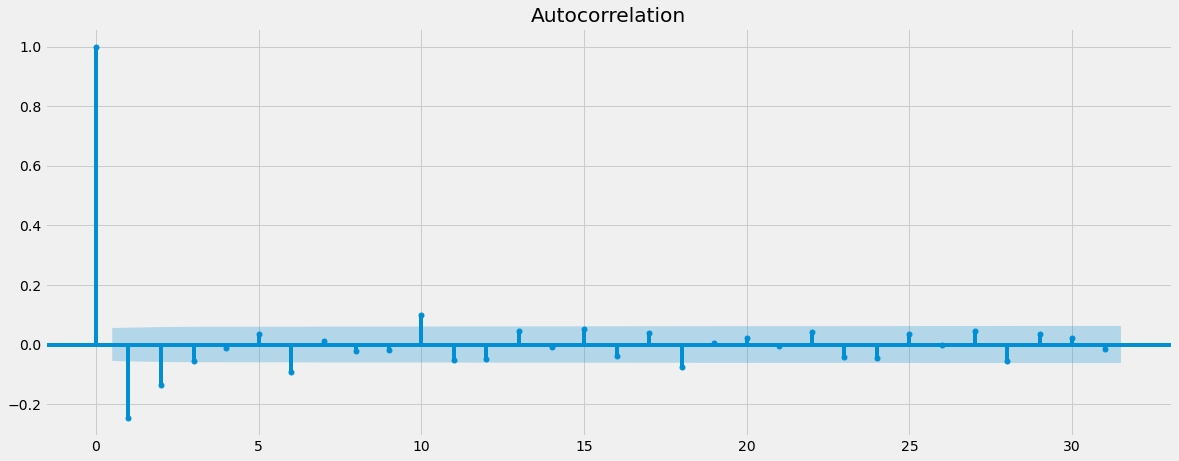

In [36]:
# Looking at the graph
plot_acf(data_diff)
plt.show()

There are no lags but the test statistic is a lot higher then the critical value.